In [1]:
import nltk
import numpy as np
import csv
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from dateutil import parser
from textblob import TextBlob
import datetime
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
stop_words = set(stopwords.words("english"))

In [3]:
data = pd.read_csv('reviews_ioCombined.csv')
print ("Original 'reviews_ioCombined.csv' CSV Data: \n")
data

Original 'reviews_ioCombined.csv' CSV Data: 



,Review,Rating,Date
0,“\n1 star: Bad\nJust now\nWe have had a bad ex...,1,1 day ago
1,“\nI spoke to such lovely people tonight who h...,5,2 weeks ago
2,“\nMy self and my business partner open busine...,1,3 weeks ago
3,“\nI asked for a charge back of £38.47.. for a...,1,4 weeks ago
4,“\nOnly thing worse than being a Natwest custo...,1,1 month ago
...,...,...,...
335,“\nNatWest couldn't do customer service if it ...,3,8 years ago
336,“\n...a pat on the back for being so helpful. ...,4,8 years ago
337,“\nTwo meetings with Natwest and still haven't...,1,8 years ago
338,“\nAwful customer service NatWest Help Oxford ...,1,8 years ago


In [4]:
comments = []
with open ("reviews_ioCombined.csv", "r", encoding ='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        comments.append(row)
        print (row)

['Review', 'Rating', 'Date']
['“\n1 star: Bad\nJust now\nWe have had a bad experience with this…\nWe have had a bad experience with this bank . Just before Christmas i went to use my card to purchase something and this got declined , i tried again and this did not work again i then tried to log online with my account and i could not i then phoned them and was on the phone for 1hour and 30 minutes i finally got through and they said my account has been blocked and i have to go through to the fraud team online to find out why . this was very stressful for me, i then sent them a email to the fraud team and asked what has happened . they had said someone has blocked my account as they have not received a parcel which they had purchased from me so my account had been blocked . so to start with this bank did not even contact me to tell me they are blocking my account or even ask me any details that i have my end to prove i had sent this item , which is really unfair ,so i emailed them every 

In [5]:
review = comments[0]
print (review)

['Review', 'Rating', 'Date']


In [6]:
del comments[0]
comments

[['“\n1 star: Bad\nJust now\nWe have had a bad experience with this…\nWe have had a bad experience with this bank . Just before Christmas i went to use my card to purchase something and this got declined , i tried again and this did not work again i then tried to log online with my account and i could not i then phoned them and was on the phone for 1hour and 30 minutes i finally got through and they said my account has been blocked and i have to go through to the fraud team online to find out why . this was very stressful for me, i then sent them a email to the fraud team and asked what has happened . they had said someone has blocked my account as they have not received a parcel which they had purchased from me so my account had been blocked . so to start with this bank did not even contact me to tell me they are blocking my account or even ask me any details that i have my end to prove i had sent this item , which is really unfair ,so i emailed them every day with the details of the 

In [7]:
review = comments[42][0].lower()
print (review)
blob = TextBlob(review)
sentiment = blob.sentiment
print (sentiment)

“
my 7 months pregnant daughter had to pay for her divorce of £30,000. she had money in different accounts and arranged to pay all the money into natwest and do the transaction to her solicitor. we went to the bank with £10,000 cash, from a bond that she cashed in. she tried to pay cash in through machine, but it didn't work, meanwhile a member of staff called over from the other side of a screen, quite loudly, to pay small bundles in at a time. we gave up and went to the cashiers desk, my daughter was asked where she got the cash from, she told cashier it was a bond and the cashier asked why it wasn't paid direct into natwest account.... once money was paid into natwest my daughter asked for all her money in the account to be transferred to solicitor, the cashier told her to go queue on the other side. she stood in queue for 8minutes (7months pregnant and upset to have to pay ex £30,000) cashier no.2 arrived and asked my daughter again , where she got the cash from that was just paid 

In [8]:
polarities = []
subjectivities = []
for doc in comments: 
    blob = TextBlob(doc[0])
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    polarities.append(polarity)
    subjectivities.append(subjectivity)

<function matplotlib.pyplot.show(close=None, block=None)>

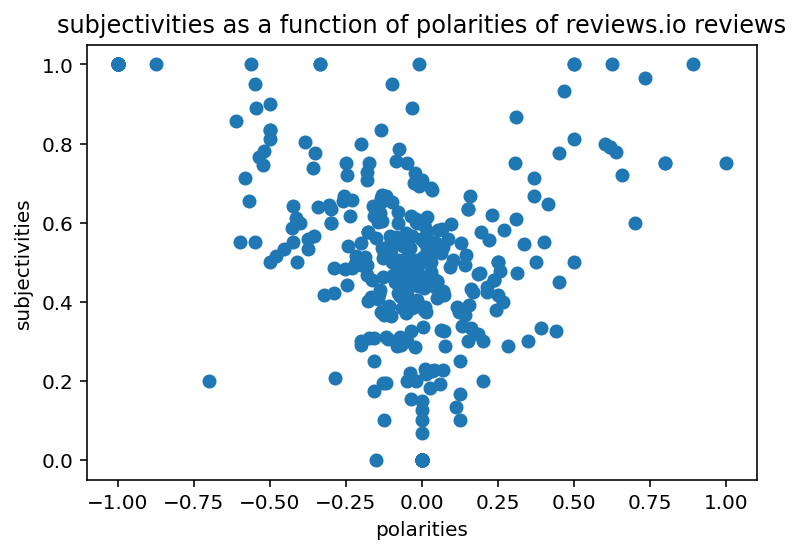

In [9]:
plt.scatter (polarities, subjectivities)
plt.xlabel ("polarities")
plt.ylabel ("subjectivities")
plt.title ("subjectivities as a function of polarities of reviews.io reviews")
plt.show

In [10]:
data ["Subjectivity"] = subjectivities 
data ["Polarity"] = polarities
data
full_data=data
full_data

,Review,Rating,Date,Subjectivity,Polarity
0,“\n1 star: Bad\nJust now\nWe have had a bad ex...,1,1 day ago,0.625000,-0.138462
1,“\nI spoke to such lovely people tonight who h...,5,2 weeks ago,0.812500,0.500000
2,“\nMy self and my business partner open busine...,1,3 weeks ago,0.414205,-0.048864
3,“\nI asked for a charge back of £38.47.. for a...,1,4 weeks ago,0.000000,0.000000
4,“\nOnly thing worse than being a Natwest custo...,1,1 month ago,0.800000,-0.200000
...,...,...,...,...,...
335,“\nNatWest couldn't do customer service if it ...,3,8 years ago,0.200000,-0.700000
336,“\n...a pat on the back for being so helpful. ...,4,8 years ago,0.100000,0.125000
337,“\nTwo meetings with Natwest and still haven't...,1,8 years ago,0.950000,-0.550000
338,“\nAwful customer service NatWest Help Oxford ...,1,8 years ago,1.000000,-1.000000


In [12]:
full_data['Score'] = data['Subjectivity'] * data['Polarity']

,Review,Rating,Date,Subjectivity,Polarity,Score
0,“\n1 star: Bad\nJust now\nWe have had a bad ex...,1,1 day ago,0.625000,-0.138462,-0.086538
1,“\nI spoke to such lovely people tonight who h...,5,2 weeks ago,0.812500,0.500000,0.406250
2,“\nMy self and my business partner open busine...,1,3 weeks ago,0.414205,-0.048864,-0.020240
3,“\nI asked for a charge back of £38.47.. for a...,1,4 weeks ago,0.000000,0.000000,0.000000
4,“\nOnly thing worse than being a Natwest custo...,1,1 month ago,0.800000,-0.200000,-0.160000
...,...,...,...,...,...,...
335,“\nNatWest couldn't do customer service if it ...,3,8 years ago,0.200000,-0.700000,-0.140000
336,“\n...a pat on the back for being so helpful. ...,4,8 years ago,0.100000,0.125000,0.012500
337,“\nTwo meetings with Natwest and still haven't...,1,8 years ago,0.950000,-0.550000,-0.522500
338,“\nAwful customer service NatWest Help Oxford ...,1,8 years ago,1.000000,-1.000000,-1.000000


In [13]:
full_data.to_csv('Reviews_ioFinal.csv', index=False)

In [14]:
pol_mean = full_data['Polarity'].mean()
sub_mean = full_data['Subjectivity'].mean()
print ("average polarity is:")
print(pol_mean)
print ("average subjectvitiy is:")
print (sub_mean)

average polarity is:
-0.056134698840952284
average subjectvitiy is:
0.5128448137416828


In [17]:
def get_past_date(str_days_ago):
    TODAY = datetime.date.today()
    splitted = str_days_ago.split()
    if len(splitted) == 1 and splitted[0].lower() == 'today':
        return str(TODAY.isoformat())
    elif len(splitted) == 1 and splitted[0].lower() == 'yesterday':
        date = TODAY - relativedelta(days=1)
        return str(date.isoformat())
    elif splitted[1].lower() in ['hour', 'hours', 'hr', 'hrs', 'h']:
        date = datetime.datetime.now() - relativedelta(hours=int(splitted[0]))
        return str(date.date().isoformat())
    elif splitted[1].lower() in ['day', 'days', 'd']:
        date = TODAY - relativedelta(days=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['wk', 'wks', 'week', 'weeks', 'w']:
        date = TODAY - relativedelta(weeks=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['mon', 'mons', 'month', 'months', 'm']:
        date = TODAY - relativedelta(months=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['yrs', 'yr', 'years', 'year', 'y']:
        date = TODAY - relativedelta(years=int(splitted[0]))
        return str(date.isoformat())
    else:
        return "Wrong Argument format"

In [13]:
dates = list(data['TIME'].values)
dates = [parser.parse(date) for date in dates]
data['TIME'] = dates
dates = matplotlib.dates.date2num(data['TIME'])
plt.plot_date(dates, data['Polarity'])
plt.title("polarity as a function of time")
plt.ylabel('Polarity')
plt.show()

ParserError: Unknown string format: Posted 8 hours ago

In [15]:
from csv import reader

outfile = open("Reviews_io.txt", "w")
with open('reviews_ioCombined.csv', 'r', encoding ='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        review = (row['COMMENT'])
        print (review)
        line = "{}\n".format(review)
        outfile.write(review)

“
Absolutely disgusting with the treatment I received in the cex shop in Cavan Ireland. Bought a phone here with disabled shortly after purchase. Brought it back to be rudely told they couldn’t do anything that I’d have to bring it to repair shop.did so and man in repair shop told me it was faulty and bring it back to cex and don’t let them fob you off. Went back to cex to be fobbed off. Only by another person who spoke to me like I was a two year old. Again never looked at phone only have me same speech the last lad did. It’s like there trained to do tell the same thing to all. Was absolutely disgusted. These are young people trained to lie. They have not heard the last from me. This shop needs highlighting and should not be allowed rip people off like they do. I say shut them down.
”
“
Only I can’t give it a zero review I bloody well would!!!! I bought a phone in my local CEX store on the 2/12/21 the phone hadnt been working from I got it the speaker was not working right probably do

UnicodeEncodeError: 'charmap' codec can't encode character '\U0001f644' in position 446: character maps to <undefined>

In [16]:
review = open ("Reviews_io.txt")

In [17]:
reviews=review.read()
reviews

"“\nAbsolutely disgusting with the treatment I received in the cex shop in Cavan Ireland. Bought a phone here with disabled shortly after purchase. Brought it back to be rudely told they couldn’t do anything that I’d have to bring it to repair shop.did so and man in repair shop told me it was faulty and bring it back to cex and don’t let them fob you off. Went back to cex to be fobbed off. Only by another person who spoke to me like I was a two year old. Again never looked at phone only have me same speech the last lad did. It’s like there trained to do tell the same thing to all. Was absolutely disgusted. These are young people trained to lie. They have not heard the last from me. This shop needs highlighting and should not be allowed rip people off like they do. I say shut them down.\n”“\nOnly I can’t give it a zero review I bloody well would!!!! I bought a phone in my local CEX store on the 2/12/21 the phone hadnt been working from I got it the speaker was not working right probably

In [18]:
reviews_token = nltk.word_tokenize(reviews)
reviews_token

['“',
 'Absolutely',
 'disgusting',
 'with',
 'the',
 'treatment',
 'I',
 'received',
 'in',
 'the',
 'cex',
 'shop',
 'in',
 'Cavan',
 'Ireland',
 '.',
 'Bought',
 'a',
 'phone',
 'here',
 'with',
 'disabled',
 'shortly',
 'after',
 'purchase',
 '.',
 'Brought',
 'it',
 'back',
 'to',
 'be',
 'rudely',
 'told',
 'they',
 'couldn',
 '’',
 't',
 'do',
 'anything',
 'that',
 'I',
 '’',
 'd',
 'have',
 'to',
 'bring',
 'it',
 'to',
 'repair',
 'shop.did',
 'so',
 'and',
 'man',
 'in',
 'repair',
 'shop',
 'told',
 'me',
 'it',
 'was',
 'faulty',
 'and',
 'bring',
 'it',
 'back',
 'to',
 'cex',
 'and',
 'don',
 '’',
 't',
 'let',
 'them',
 'fob',
 'you',
 'off',
 '.',
 'Went',
 'back',
 'to',
 'cex',
 'to',
 'be',
 'fobbed',
 'off',
 '.',
 'Only',
 'by',
 'another',
 'person',
 'who',
 'spoke',
 'to',
 'me',
 'like',
 'I',
 'was',
 'a',
 'two',
 'year',
 'old',
 '.',
 'Again',
 'never',
 'looked',
 'at',
 'phone',
 'only',
 'have',
 'me',
 'same',
 'speech',
 'the',
 'last',
 'lad',
 'did'

In [19]:
norm = [word.lower()for word in reviews_token if word.isalpha()]
norm

['absolutely',
 'disgusting',
 'with',
 'the',
 'treatment',
 'i',
 'received',
 'in',
 'the',
 'cex',
 'shop',
 'in',
 'cavan',
 'ireland',
 'bought',
 'a',
 'phone',
 'here',
 'with',
 'disabled',
 'shortly',
 'after',
 'purchase',
 'brought',
 'it',
 'back',
 'to',
 'be',
 'rudely',
 'told',
 'they',
 'couldn',
 't',
 'do',
 'anything',
 'that',
 'i',
 'd',
 'have',
 'to',
 'bring',
 'it',
 'to',
 'repair',
 'so',
 'and',
 'man',
 'in',
 'repair',
 'shop',
 'told',
 'me',
 'it',
 'was',
 'faulty',
 'and',
 'bring',
 'it',
 'back',
 'to',
 'cex',
 'and',
 'don',
 't',
 'let',
 'them',
 'fob',
 'you',
 'off',
 'went',
 'back',
 'to',
 'cex',
 'to',
 'be',
 'fobbed',
 'off',
 'only',
 'by',
 'another',
 'person',
 'who',
 'spoke',
 'to',
 'me',
 'like',
 'i',
 'was',
 'a',
 'two',
 'year',
 'old',
 'again',
 'never',
 'looked',
 'at',
 'phone',
 'only',
 'have',
 'me',
 'same',
 'speech',
 'the',
 'last',
 'lad',
 'did',
 'it',
 's',
 'like',
 'there',
 'trained',
 'to',
 'do',
 'tell'

In [20]:
filtered_words = [word for word in norm if word not in stop_words]
filtered_words

['absolutely',
 'disgusting',
 'treatment',
 'received',
 'cex',
 'shop',
 'cavan',
 'ireland',
 'bought',
 'phone',
 'disabled',
 'shortly',
 'purchase',
 'brought',
 'back',
 'rudely',
 'told',
 'anything',
 'bring',
 'repair',
 'man',
 'repair',
 'shop',
 'told',
 'faulty',
 'bring',
 'back',
 'cex',
 'let',
 'fob',
 'went',
 'back',
 'cex',
 'fobbed',
 'another',
 'person',
 'spoke',
 'like',
 'two',
 'year',
 'old',
 'never',
 'looked',
 'phone',
 'speech',
 'last',
 'lad',
 'like',
 'trained',
 'tell',
 'thing',
 'absolutely',
 'disgusted',
 'young',
 'people',
 'trained',
 'lie',
 'heard',
 'last',
 'shop',
 'needs',
 'highlighting',
 'allowed',
 'rip',
 'people',
 'like',
 'say',
 'shut',
 'give',
 'zero',
 'review',
 'bloody',
 'well',
 'would',
 'bought',
 'phone',
 'local',
 'cex',
 'store',
 'phone',
 'hadnt',
 'working',
 'got',
 'speaker',
 'working',
 'right',
 'probably',
 'fact',
 'day',
 'got',
 'lad',
 'serving',
 'dropped',
 'counter',
 'took',
 'back',
 'today',
 '

In [21]:
fw_fd = nltk.FreqDist(filtered_words)
fw_fd

FreqDist({'cex': 30, 'back': 29, 'bought': 19, 'shop': 17, 'phone': 17, 'told': 17, 'get': 14, 'store': 13, 'buy': 13, 'warranty': 13, ...})

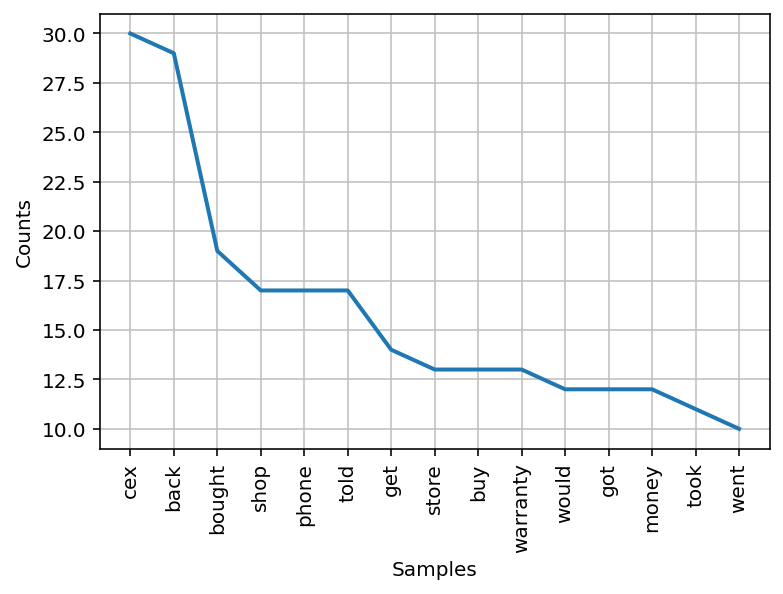

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
fw_fd.plot(15, cumulative=False)